Made by [Sharkbyteprojects](https://github.com/sharkbyteprojects)

[ON GITHUB](https://github.com/Sharkbyteprojects/IRIS-ML_and_Deep-Learning)

[Other Example](https://mybinder.org/v2/gh/Sharkbyteprojects/IRIS-ML_and_Deep-Learning/master?filepath=csv%20based%2F%3D%20or%20not.ipynb)

Need


- Keras
- SKLEARN
- numpy
- seaborn


In [1]:
from keras.layers import Input
import numpy as np
from keras.layers import Dense
inputs=Input(shape=(4,))
fc=Dense(3)(inputs)
from keras.models import Model
model=Model(input=inputs,output=fc)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


Zeige infos über Model:

In [2]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


Compile and add new Neurons

In [3]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])
predictionss=Dense(8,activation="softmax")(fc)
predictions=Dense(3,activation="softmax")(predictionss)

Test of Model:

In [4]:
az=model.predict(np.array([[5.1,5.3,1.4,0.2]]))

Recompile and Retry


In [5]:
model=Model(input=inputs,output=predictions)
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])
model.summary()
aza=model.predict(np.array([[5.1,5.3,1.4,0.2]]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


train it


In [6]:
from sklearn import datasets
iris =datasets.load_iris()
X=np.array(iris.data)
y=np.array(iris.target)
X.shape, y.shape
from keras.utils.np_utils import to_categorical
y=to_categorical(y,3)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

complete prepare for train, start train:


In [7]:
model.fit(X_train, y_train,epochs=500,validation_split=0.3)

Train on 84 samples, validate on 36 samples
Epoch 1/500
84/84 [==============================] - 4s 42ms/step - loss: 1.0999 - accuracy: 0.3452 - val_loss: 1.1103 - val_accuracy: 0.3056
Epoch 2/500
84/84 [==============================] - 0s 274us/step - loss: 1.0970 - accuracy: 0.3452 - val_loss: 1.1071 - val_accuracy: 0.3056
Epoch 3/500
84/84 [==============================] - 0s 310us/step - loss: 1.0942 - accuracy: 0.3452 - val_loss: 1.1040 - val_accuracy: 0.3056
Epoch 4/500
84/84 [==============================] - 0s 238us/step - loss: 1.0912 - accuracy: 0.3452 - val_loss: 1.1010 - val_accuracy: 0.3056
Epoch 5/500
84/84 [==============================] - 0s 286us/step - loss: 1.0882 - accuracy: 0.3452 - val_loss: 1.0979 - val_accuracy: 0.3056
Epoch 6/500
84/84 [==============================] - 0s 286us/step - loss: 1.0853 - accuracy: 0.3452 - val_loss: 1.0949 - val_accuracy: 0.3056
Epoch 7/500
84/84 [==============================] - 0s 274us/step - loss: 1.0824 - accuracy: 0.345

Epoch 58/500
84/84 [==============================] - 0s 286us/step - loss: 0.9009 - accuracy: 0.7143 - val_loss: 0.9104 - val_accuracy: 0.6667
Epoch 59/500
84/84 [==============================] - 0s 310us/step - loss: 0.8970 - accuracy: 0.7143 - val_loss: 0.9066 - val_accuracy: 0.6667
Epoch 60/500
84/84 [==============================] - 0s 286us/step - loss: 0.8932 - accuracy: 0.7024 - val_loss: 0.9029 - val_accuracy: 0.6667
Epoch 61/500
84/84 [==============================] - 0s 298us/step - loss: 0.8893 - accuracy: 0.7024 - val_loss: 0.8991 - val_accuracy: 0.6667
Epoch 62/500
84/84 [==============================] - 0s 310us/step - loss: 0.8856 - accuracy: 0.7024 - val_loss: 0.8954 - val_accuracy: 0.6667
Epoch 63/500
84/84 [==============================] - 0s 310us/step - loss: 0.8818 - accuracy: 0.7024 - val_loss: 0.8917 - val_accuracy: 0.6667
Epoch 64/500
84/84 [==============================] - 0s 369us/step - loss: 0.8780 - accuracy: 0.7024 - val_loss: 0.8880 - val_accuracy:

Epoch 115/500
84/84 [==============================] - 0s 619us/step - loss: 0.7108 - accuracy: 0.8095 - val_loss: 0.7124 - val_accuracy: 0.8889
Epoch 116/500
84/84 [==============================] - 0s 381us/step - loss: 0.7073 - accuracy: 0.8095 - val_loss: 0.7087 - val_accuracy: 0.9167
Epoch 117/500
84/84 [==============================] - 0s 286us/step - loss: 0.7039 - accuracy: 0.8095 - val_loss: 0.7047 - val_accuracy: 0.9167
Epoch 118/500
84/84 [==============================] - 0s 357us/step - loss: 0.7006 - accuracy: 0.8095 - val_loss: 0.7011 - val_accuracy: 0.9167
Epoch 119/500
84/84 [==============================] - 0s 345us/step - loss: 0.6970 - accuracy: 0.8095 - val_loss: 0.6971 - val_accuracy: 0.9167
Epoch 120/500
84/84 [==============================] - 0s 536us/step - loss: 0.6935 - accuracy: 0.8214 - val_loss: 0.6931 - val_accuracy: 0.9167
Epoch 121/500
84/84 [==============================] - 0s 333us/step - loss: 0.6900 - accuracy: 0.8214 - val_loss: 0.6890 - val_ac

84/84 [==============================] - 0s 333us/step - loss: 0.5407 - accuracy: 0.9286 - val_loss: 0.5149 - val_accuracy: 1.0000
Epoch 172/500
84/84 [==============================] - 0s 250us/step - loss: 0.5385 - accuracy: 0.9405 - val_loss: 0.5115 - val_accuracy: 1.0000
Epoch 173/500
84/84 [==============================] - 0s 274us/step - loss: 0.5354 - accuracy: 0.9405 - val_loss: 0.5084 - val_accuracy: 1.0000
Epoch 174/500
84/84 [==============================] - 0s 238us/step - loss: 0.5328 - accuracy: 0.9405 - val_loss: 0.5052 - val_accuracy: 1.0000
Epoch 175/500
84/84 [==============================] - 0s 238us/step - loss: 0.5304 - accuracy: 0.9524 - val_loss: 0.5021 - val_accuracy: 1.0000
Epoch 176/500
84/84 [==============================] - 0s 333us/step - loss: 0.5278 - accuracy: 0.9643 - val_loss: 0.4990 - val_accuracy: 1.0000
Epoch 177/500
84/84 [==============================] - 0s 298us/step - loss: 0.5252 - accuracy: 0.9643 - val_loss: 0.4961 - val_accuracy: 1.0000

84/84 [==============================] - 0s 310us/step - loss: 0.4149 - accuracy: 0.9643 - val_loss: 0.3690 - val_accuracy: 1.0000
Epoch 228/500
84/84 [==============================] - 0s 274us/step - loss: 0.4132 - accuracy: 0.9643 - val_loss: 0.3667 - val_accuracy: 1.0000
Epoch 229/500
84/84 [==============================] - 0s 500us/step - loss: 0.4110 - accuracy: 0.9643 - val_loss: 0.3645 - val_accuracy: 1.0000
Epoch 230/500
84/84 [==============================] - 0s 405us/step - loss: 0.4102 - accuracy: 0.9643 - val_loss: 0.3627 - val_accuracy: 1.0000
Epoch 231/500
84/84 [==============================] - 0s 310us/step - loss: 0.4076 - accuracy: 0.9643 - val_loss: 0.3602 - val_accuracy: 1.0000
Epoch 232/500
84/84 [==============================] - 0s 417us/step - loss: 0.4053 - accuracy: 0.9643 - val_loss: 0.3581 - val_accuracy: 1.0000
Epoch 233/500
84/84 [==============================] - 0s 286us/step - loss: 0.4038 - accuracy: 0.9643 - val_loss: 0.3560 - val_accuracy: 1.0000

84/84 [==============================] - 0s 357us/step - loss: 0.3273 - accuracy: 0.9643 - val_loss: 0.2740 - val_accuracy: 1.0000
Epoch 284/500
84/84 [==============================] - 0s 322us/step - loss: 0.3260 - accuracy: 0.9643 - val_loss: 0.2729 - val_accuracy: 1.0000
Epoch 285/500
84/84 [==============================] - 0s 322us/step - loss: 0.3245 - accuracy: 0.9762 - val_loss: 0.2720 - val_accuracy: 1.0000
Epoch 286/500
84/84 [==============================] - 0s 310us/step - loss: 0.3234 - accuracy: 0.9762 - val_loss: 0.2708 - val_accuracy: 1.0000
Epoch 287/500
84/84 [==============================] - 0s 322us/step - loss: 0.3224 - accuracy: 0.9762 - val_loss: 0.2696 - val_accuracy: 1.0000
Epoch 288/500
84/84 [==============================] - 0s 512us/step - loss: 0.3216 - accuracy: 0.9643 - val_loss: 0.2674 - val_accuracy: 1.0000
Epoch 289/500
84/84 [==============================] - 0s 298us/step - loss: 0.3203 - accuracy: 0.9762 - val_loss: 0.2665 - val_accuracy: 1.0000

84/84 [==============================] - 0s 417us/step - loss: 0.2677 - accuracy: 0.9643 - val_loss: 0.2134 - val_accuracy: 1.0000
Epoch 340/500
84/84 [==============================] - 0s 405us/step - loss: 0.2667 - accuracy: 0.9762 - val_loss: 0.2130 - val_accuracy: 1.0000
Epoch 341/500
84/84 [==============================] - 0s 452us/step - loss: 0.2666 - accuracy: 0.9762 - val_loss: 0.2127 - val_accuracy: 1.0000
Epoch 342/500
84/84 [==============================] - 0s 595us/step - loss: 0.2649 - accuracy: 0.9762 - val_loss: 0.2108 - val_accuracy: 1.0000
Epoch 343/500
84/84 [==============================] - 0s 595us/step - loss: 0.2641 - accuracy: 0.9762 - val_loss: 0.2095 - val_accuracy: 1.0000
Epoch 344/500
84/84 [==============================] - 0s 738us/step - loss: 0.2636 - accuracy: 0.9762 - val_loss: 0.2078 - val_accuracy: 1.0000
Epoch 345/500
84/84 [==============================] - 0s 762us/step - loss: 0.2627 - accuracy: 0.9643 - val_loss: 0.2071 - val_accuracy: 1.0000

84/84 [==============================] - 0s 333us/step - loss: 0.2262 - accuracy: 0.9762 - val_loss: 0.1747 - val_accuracy: 1.0000
Epoch 396/500
84/84 [==============================] - 0s 417us/step - loss: 0.2257 - accuracy: 0.9762 - val_loss: 0.1731 - val_accuracy: 1.0000
Epoch 397/500
84/84 [==============================] - 0s 322us/step - loss: 0.2251 - accuracy: 0.9762 - val_loss: 0.1726 - val_accuracy: 1.0000
Epoch 398/500
84/84 [==============================] - 0s 798us/step - loss: 0.2243 - accuracy: 0.9762 - val_loss: 0.1712 - val_accuracy: 1.0000
Epoch 399/500
84/84 [==============================] - ETA: 0s - loss: 0.1668 - accuracy: 1.00 - 0s 310us/step - loss: 0.2239 - accuracy: 0.9762 - val_loss: 0.1701 - val_accuracy: 1.0000
Epoch 400/500
84/84 [==============================] - 0s 310us/step - loss: 0.2232 - accuracy: 0.9762 - val_loss: 0.1693 - val_accuracy: 1.0000
Epoch 401/500
84/84 [==============================] - 0s 298us/step - loss: 0.2226 - accuracy: 0.9762

84/84 [==============================] - 0s 345us/step - loss: 0.1961 - accuracy: 0.9762 - val_loss: 0.1456 - val_accuracy: 1.0000
Epoch 452/500
84/84 [==============================] - 0s 297us/step - loss: 0.1957 - accuracy: 0.9762 - val_loss: 0.1467 - val_accuracy: 1.0000
Epoch 453/500
84/84 [==============================] - 0s 321us/step - loss: 0.1953 - accuracy: 0.9762 - val_loss: 0.1470 - val_accuracy: 1.0000
Epoch 454/500
84/84 [==============================] - 0s 345us/step - loss: 0.1949 - accuracy: 0.9762 - val_loss: 0.1463 - val_accuracy: 1.0000
Epoch 455/500
84/84 [==============================] - 0s 488us/step - loss: 0.1944 - accuracy: 0.9762 - val_loss: 0.1458 - val_accuracy: 1.0000
Epoch 456/500
84/84 [==============================] - 0s 357us/step - loss: 0.1938 - accuracy: 0.9762 - val_loss: 0.1447 - val_accuracy: 1.0000
Epoch 457/500
84/84 [==============================] - 0s 405us/step - loss: 0.1935 - accuracy: 0.9762 - val_loss: 0.1436 - val_accuracy: 1.0000

Test


In [8]:
print("1. 1 Neuron")
print(az)
print("2. 2 Neuron:")
print(aza)
print("3. Train")
print(model.predict(np.array([[5.1,5.3,1.4,0.2]])))

1. 1 Neuron
[[-3.9987524 -5.0789557 -2.2721539]]
2. 2 Neuron:
[[0.41606846 0.3471314  0.23680013]]
3. Train
[[0.9061072  0.05650232 0.0373905 ]]


using testdata

In [9]:
train_loss, train_accuracy=model.evaluate(X_train, y_train)
round(train_loss*100,1), round(train_accuracy*100,1)

120/120 [==============================] - 0s 142us/step


(16.1, 98.3)

In [10]:
test_loss, test_accuracy=model.evaluate(X_test, y_test)
round(test_loss*100,1), round(test_accuracy*100,1)

30/30 [==============================] - 0s 67us/step


(15.0, 100.0)

### HOW TO:
Using This Iris Framework (Data in MM)

In [11]:
print(model.predict(np.array([[5.1,5.3,1.4,0.2]])))#RANGE: SEPAL LENGHT, SEPAL WIDTH,PETAL LENGHT, PETAL WIDTH

[[0.9061072  0.05650232 0.0373905 ]]


---

## Vergleich mit ML

In [12]:
Xy=iris.data
yy=iris.data
Xy_sepal_lenght=Xy[:,0]
Xy_sepal_width=Xy[:,1]
Xy_petal_lenght=Xy[:,2]
Xy_petal_width=Xy[:,3]
from sklearn.model_selection import train_test_split
Xy_train, Xy_test, yy_train, yy_test=train_test_split(X,y,test_size=0.4)
#USING NEAREST NEIGHBORS
from sklearn import neighbors
clf=neighbors.KNeighborsClassifier(1)
clf.fit(Xy_train,yy_train)
print(clf.score(Xy_train,yy_train))
print(clf.score(Xy_test,yy_test))

1.0
0.9666666666666667


## Vergleich

In [13]:
print("Deep Learning:")
deplearn=model.predict(np.array([[6.3,2.7,5.5,1.5]]))
print("Probability for zero in percent")
print(round(deplearn[0][0]*100,1))
print("Probability for one in percent")
print(round(deplearn[0][1]*100,1))
print("Probability for two in percent")
print(round(deplearn[0][2]*100,1))

Deep Learning:
Probability for zero in percent
3.1
Probability for one in percent
9.6
Probability for two in percent
87.4


In [14]:
print("ML:")
clf.predict([[6.3,2.7,5.5,1.5]])

ML:


array([[0., 0., 1.]], dtype=float32)

### distribution of data

In [15]:
import seaborn as sns
sns.jointplot(Xy_sepal_lenght, Xy_petal_lenght)

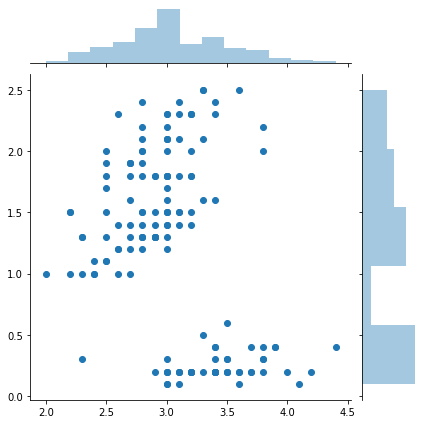

In [16]:
sns.jointplot(Xy_sepal_width, Xy_petal_width)